## Installing Libraires

In [1]:
pip install --upgrade nltk

   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 1.5/1.5 MB 7.9 MB/s eta 0:00:00a 0:00:01
  Attempting uninstall: nltk
    Found existing installation: nltk 3.2.4
    Uninstalling nltk-3.2.4:
      Successfully uninstalled nltk-3.2.4
ERROR: pip's dependency resolver does not currently take into account all the packages that are installed. This behaviour is the source of the following dependency conflicts.
preprocessing 0.1.13 requires nltk==3.2.4, but you have nltk 3.8.1 which is incompatible.
Note: you may need to restart the kernel to use updated packages.


In [2]:
import numpy as np 
import pandas as pd 
import seaborn as sns 
import matplotlib.pyplot as plt
plt.style.use('ggplot')
import plotly.express as px
from sklearn.metrics import roc_curve, auc
from sklearn.metrics import classification_report, confusion_matrix
import nltk
from nltk.corpus import stopwords
from nltk.stem import PorterStemmer 
nltk.download('wordnet')
from sklearn.model_selection import train_test_split
from mlxtend.plotting import plot_confusion_matrix
import matplotlib.cm as cm
from matplotlib import rcParams
from collections import Counter
from nltk.tokenize import RegexpTokenizer
from sklearn.feature_extraction.text import TfidfVectorizer
import re
import string
from sklearn.ensemble import RandomForestClassifier
from tensorflow.keras.layers import LSTM, Activation, Dense, Dropout, Input, Embedding
from tensorflow.keras.models import Model
#from keras.layers import Input, Embedding, LSTM, Dense
#from keras.models import Model
from tensorflow.keras.optimizers import RMSprop
from tensorflow.keras.preprocessing.text import Tokenizer
from tensorflow.keras.preprocessing import sequence
%matplotlib inline
from nltk.stem import WordNetLemmatizer
import warnings
warnings.filterwarnings("ignore")

[nltk_data] Downloading package wordnet to /usr/share/nltk_data...
[nltk_data]   Package wordnet is already up-to-date!
2024-05-01 11:10:15.795449: E external/local_xla/xla/stream_executor/cuda/cuda_dnn.cc:9261] Unable to register cuDNN factory: Attempting to register factory for plugin cuDNN when one has already been registered
2024-05-01 11:10:15.795548: E external/local_xla/xla/stream_executor/cuda/cuda_fft.cc:607] Unable to register cuFFT factory: Attempting to register factory for plugin cuFFT when one has already been registered
2024-05-01 11:10:15.953543: E external/local_xla/xla/stream_executor/cuda/cuda_blas.cc:1515] Unable to register cuBLAS factory: Attempting to register factory for plugin cuBLAS when one has already been registered


In [3]:
# Import necessary libraries
from sklearn.naive_bayes import BernoulliNB
from sklearn.svm import SVC
from sklearn.linear_model import LogisticRegression
from xgboost import XGBClassifier
from sklearn.metrics import accuracy_score, classification_report, confusion_matrix
# Import necessary libraries
from keras.models import Sequential
from tensorflow.keras.layers import Bidirectional, Embedding, LSTM, Dense, Dropout
from keras.callbacks import EarlyStopping
from tensorflow.keras.preprocessing.text import Tokenizer
from keras.preprocessing.sequence import pad_sequences
from sklearn.model_selection import train_test_split
from keras.models import Sequential


In [ ]:
from keras.layers import Conv1D
from keras.layers import Input, Embedding, LSTM, Dense, Activation, Dropout, Conv1D, Bidirectional
from keras.models import Model
from keras.layers import Input, Embedding, LSTM, Dense, Activation, Dropout, Conv1D, Bidirectional


## Reading the dataset

In [4]:
column_names = ["target", "id", "date", "flag", "user", "text"]

# Read the CSV file with specified column names
df = pd.read_csv("/kaggle/input/sentiment140/training.1600000.processed.noemoticon.csv", 
                 encoding="ISO-8859-1", names=column_names)

In [5]:
df

,target,id,date,flag,user,text
0,0,1467810369,Mon Apr 06 22:19:45 PDT 2009,NO_QUERY,_TheSpecialOne_,"@switchfoot http://twitpic.com/2y1zl - Awww, t..."
1,0,1467810672,Mon Apr 06 22:19:49 PDT 2009,NO_QUERY,scotthamilton,is upset that he can't update his Facebook by ...
2,0,1467810917,Mon Apr 06 22:19:53 PDT 2009,NO_QUERY,mattycus,@Kenichan I dived many times for the ball. Man...
3,0,1467811184,Mon Apr 06 22:19:57 PDT 2009,NO_QUERY,ElleCTF,my whole body feels itchy and like its on fire
4,0,1467811193,Mon Apr 06 22:19:57 PDT 2009,NO_QUERY,Karoli,"@nationwideclass no, it's not behaving at all...."
...,...,...,...,...,...,...
1599995,4,2193601966,Tue Jun 16 08:40:49 PDT 2009,NO_QUERY,AmandaMarie1028,Just woke up. Having no school is the best fee...
1599996,4,2193601969,Tue Jun 16 08:40:49 PDT 2009,NO_QUERY,TheWDBoards,TheWDB.com - Very cool to hear old Walt interv...
1599997,4,2193601991,Tue Jun 16 08:40:49 PDT 2009,NO_QUERY,bpbabe,Are you ready for your MoJo Makeover? Ask me f...
1599998,4,2193602064,Tue Jun 16 08:40:49 PDT 2009,NO_QUERY,tinydiamondz,Happy 38th Birthday to my boo of alll time!!! ...


selecting target and features


In [6]:
data2 = df[["target","text"]]

In [7]:
data2.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1600000 entries, 0 to 1599999
Data columns (total 2 columns):
 #   Column  Non-Null Count    Dtype 
---  ------  --------------    ----- 
 0   target  1600000 non-null  int64 
 1   text    1600000 non-null  object
dtypes: int64(1), object(1)
memory usage: 24.4+ MB


## Take 10k Data with each class has 5k data

Separate samples for each class


In [8]:
class_0_data = data2[data2['target'] == 0]
class_4_data = data2[data2['target'] == 4]

Randomly select 5,000 samples from each class


In [9]:
class_0_sample = class_0_data.sample(n=10000, random_state=42)
class_4_sample = class_4_data.sample(n=10000, random_state=42)

Concatenate the samples,Shuffle the DataFrame to mix the samples


In [10]:
data = pd.concat([class_0_sample, class_4_sample])
data = data.sample(frac=1, random_state=42).reset_index(drop=True)

Data shape

In [11]:
data.shape

(20000, 2)

In [12]:
target_df = data['target'].value_counts().reset_index()

### Count of each class Samples

In [13]:
target_df

,target,count
0,4,10000
1,0,10000


### Visualization of Samples count of each class

In [14]:
fig = px.pie(target_df, values='count', names='target',title='Target Distribution')
fig.show()

### Making the taget class 4 to 1


In [15]:
data['target'][data['target']==4]=1


### Understang the main words

In [16]:

# function to collect hashtags
def hashtag_extract(x):
    hashtags = []
    # Loop over the words in the tweet
    for i in x:
        ht = re.findall(r"#(\w+)", str(i))  # Convert to string before applying regex
        hashtags.append(ht)

    return hashtags


HT_regular = hashtag_extract(data['text'][data['target'] == 0])

HT_negative = hashtag_extract(data['text'][data['target'] == 1])

# unnesting list
HT_regular = sum(HT_regular, [])
HT_negative = sum(HT_negative, [])


In [17]:
HT_regular

['momoams',
 'ipv6summit',
 'Bose',
 'iPhone',
 'fb',
 'fb',
 'Outdoors',
 'hhrs',
 'adlounge',
 'BEA09',
 'squarespace',
 'hamr',
 'fail',
 'e3',
 'iPhone',
 '3',
 'Australia',
 'stopthebnp',
 'origin',
 'QLD',
 'dinoberry',
 'squarespace',
 'trackle',
 'MSWindows',
 'iranelection',
 'firstrecord',
 'windows',
 'newyork',
 'KEVINJONAS',
 'KEVINJONAS',
 'KEVINJONAS',
 'KEVINJONAS',
 'KEVINJONAS',
 'KJ',
 'KJ',
 'iranelection',
 'sytycd',
 'unite',
 'artfire',
 'votehandmade',
 'etsy',
 'squarespace',
 'webdd',
 'fail',
 'itsucks',
 'BEAtwittyparty',
 'fb',
 'porridge',
 'toast',
 'GilmoreGirlsSunday',
 'toughlove',
 'MySQL',
 'dentc',
 'iranelection',
 'BSB',
 'fb',
 'terminator',
 'platformbiased',
 'iPhone',
 'apple',
 'iranelection',
 'MichelleObama',
 'BaliBelly',
 'e3',
 'tweetdeck',
 'iranelection',
 'summerschool',
 'Sadness',
 'yayman',
 'pre',
 'webos',
 'trackle',
 'IranElection',
 'inaperfectworld',
 'BSG',
 'bluray',
 'IranElection',
 'ASUS',
 'acre',
 'BB10',
 'Tweetie',
 

In [18]:
HT_negative

['followfriday',
 'FF',
 'ilove',
 'zenjar',
 'idol',
 'BrandonFlowers',
 'kfanyc',
 'web20',
 'prologue',
 'ChiTellMSFT',
 'jocorequests',
 'musiciangeekery',
 'nambu',
 'lions',
 'herebeforeoprah',
 'musicmonday',
 'NoUndiesSunday',
 'followfriday',
 'iamking',
 'ff',
 'coolshite',
 'smtb',
 'followfriday',
 '700',
 'voteforrob',
 'twittertourney',
 'Phish',
 'RedWings',
 'mcflyforgermany',
 'mcflyforgermany',
 'mcflyforgermany',
 'mcflyforgermany',
 'mcflyforgermany',
 'mcflyforgermany',
 'mcflyforgermany',
 'mcflyforgermany',
 'rofl',
 '39',
 'suckmyhypotheticalballs',
 '3',
 'FullMoonCrazy',
 'honda',
 'fuzo',
 'eric',
 'followfriday',
 'raceforlife',
 'Follow',
 'bgt',
 '3',
 'TwitterTakeover',
 'flagstaff',
 'flg',
 '24',
 'db140',
 'twitterquitter',
 'followfriday',
 'iloveyou',
 'followfriday',
 'FNWC',
 'harpersglobe',
 'JobAngels',
 '4',
 'myweakess',
 'pl',
 'bgt',
 'jewelry',
 'jewellery',
 'jonaslive',
 'ifIknowwhatsgoodforme',
 'fletcherday',
 'Inappropriatemovies',
 'Mo

### Non-Racist/Not Hate Tweets


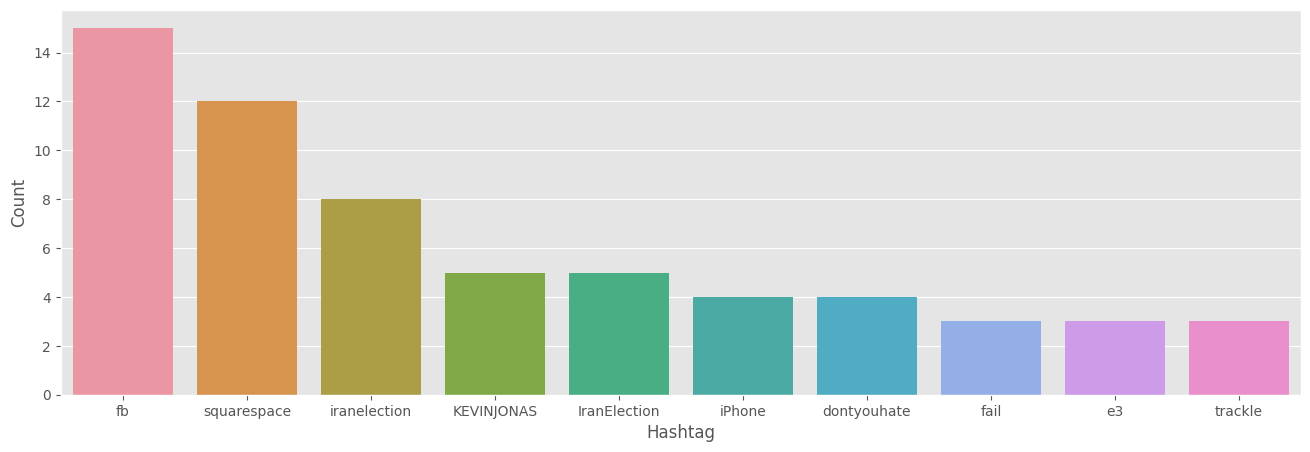

In [19]:
a = nltk.FreqDist(HT_regular)
d = pd.DataFrame({'Hashtag': list(a.keys()),
                  'Count': list(a.values())})
# selecting top 10 most frequent hashtags     
d = d.nlargest(columns="Count", n = 10) 
plt.figure(figsize=(16,5))
ax = sns.barplot(data=d, x= "Hashtag", y = "Count")
ax.set(ylabel = 'Count')
plt.show()

### Racist/Hate Tweets



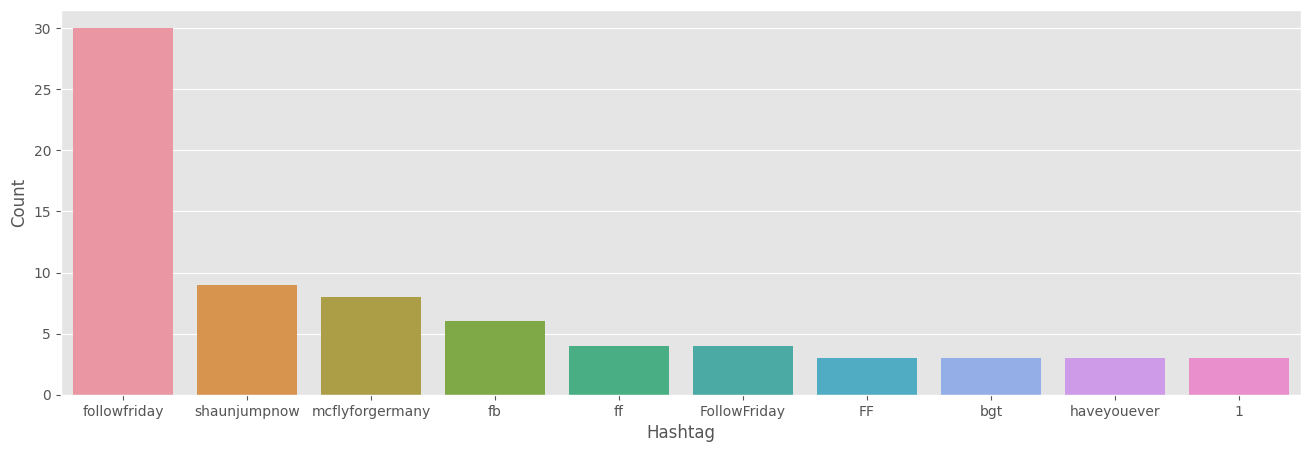

In [20]:
b = nltk.FreqDist(HT_negative)
e = pd.DataFrame({'Hashtag': list(b.keys()), 'Count': list(b.values())})
e = e.nlargest(columns="Count", n = 10)   
plt.figure(figsize=(16,5))
ax = sns.barplot(data=e, x= "Hashtag", y = "Count")
ax.set(ylabel = 'Count')
plt.show()

# Data Preprocessing

### Lower Case

In [21]:
data['text']=data['text'].str.lower()

### Stop words Removal

In [22]:
stopwords_list = stopwords.words('english')


In [23]:
STOPWORDS = set(stopwords_list)
def cleaning_stopwords(text):
    return " ".join([word for word in str(text).split() if word not in STOPWORDS])

In [24]:
data['text'] = data['text'].apply(lambda text: cleaning_stopwords(text))

In [25]:
data['text'].head()

0    @dawnrichard thanks luv...keep grind going (li...
1                     feel like watching life aquatic.
2    aparentally early morning erol died heart atta...
3            chopchop, get dressed! getting ready work
4                          @misshaleymae know baby ! x
Name: text, dtype: object

### Remove Emails

Removing mails and urls


In [26]:
def cleaning_email(data):
    return re.sub('@[^\s]+', ' ', data)

In [27]:
data['text']= data['text'].apply(lambda x: cleaning_email(x))
data['text'].head()

0      thanks luv...keep grind going (like know u w...
1                     feel like watching life aquatic.
2    aparentally early morning erol died heart atta...
3            chopchop, get dressed! getting ready work
4                                        know baby ! x
Name: text, dtype: object

### Remove URLS

In [28]:
def cleaning_URLs(data):
    return re.sub('((www\.[^\s]+)|(https?://[^\s]+))',' ',data)

In [29]:
data['text'] = data['text'].apply(lambda x: cleaning_URLs(x))
data['text'].head()

0      thanks luv...keep grind going (like know u w...
1                     feel like watching life aquatic.
2    aparentally early morning erol died heart atta...
3            chopchop, get dressed! getting ready work
4                                        know baby ! x
Name: text, dtype: object

### Remove Punctuations 

In [30]:
english_punctuations = string.punctuation
english_punctuations



'!"#$%&\'()*+,-./:;<=>?@[\\]^_`{|}~'

In [31]:
def cleaning_punctuations(text):
    translator = str.maketrans('', '', english_punctuations)
    return text.translate(translator)

In [32]:
data['text'] = data['text'].apply(lambda text: cleaning_punctuations(text))


In [33]:
data['text'].head()

0      thanks luvkeep grind going like know u wills...
1                      feel like watching life aquatic
2    aparentally early morning erol died heart atta...
3              chopchop get dressed getting ready work
4                                         know baby  x
Name: text, dtype: object

### Remove numbers

In [34]:
# removing number

def cleaning_numbers(data):
    return re.sub('[0-9]+', '', data)

In [35]:
data['text'] = data['text'].apply(lambda x: cleaning_numbers(x))
data['text'].head()

0      thanks luvkeep grind going like know u wills...
1                      feel like watching life aquatic
2    aparentally early morning erol died heart atta...
3              chopchop get dressed getting ready work
4                                         know baby  x
Name: text, dtype: object

## Tokenization

In [36]:
tokenizer = RegexpTokenizer(r'\w+')
data['text'] = data['text'].apply(tokenizer.tokenize)

In [37]:
data['text'].head()

0    [thanks, luvkeep, grind, going, like, know, u,...
1                [feel, like, watching, life, aquatic]
2    [aparentally, early, morning, erol, died, hear...
3       [chopchop, get, dressed, getting, ready, work]
4                                      [know, baby, x]
Name: text, dtype: object

## lemmatization

In [38]:
def lemmatizer_on_text(words):
    lemmatizer = WordNetLemmatizer()
    return [lemmatizer.lemmatize(word) for word in words]

data['text'] = data['text'].apply(lambda x: lemmatizer_on_text(x))

In [39]:
data['text'].head()

0    [thanks, luvkeep, grind, going, like, know, u,...
1                [feel, like, watching, life, aquatic]
2    [aparentally, early, morning, erol, died, hear...
3       [chopchop, get, dressed, getting, ready, work]
4                                      [know, baby, x]
Name: text, dtype: object

### Separating Target and Text Column

In [87]:
X=data.text
y=data.target

### Plot a cloud of words for negative tweets



In [41]:
from wordcloud import WordCloud 

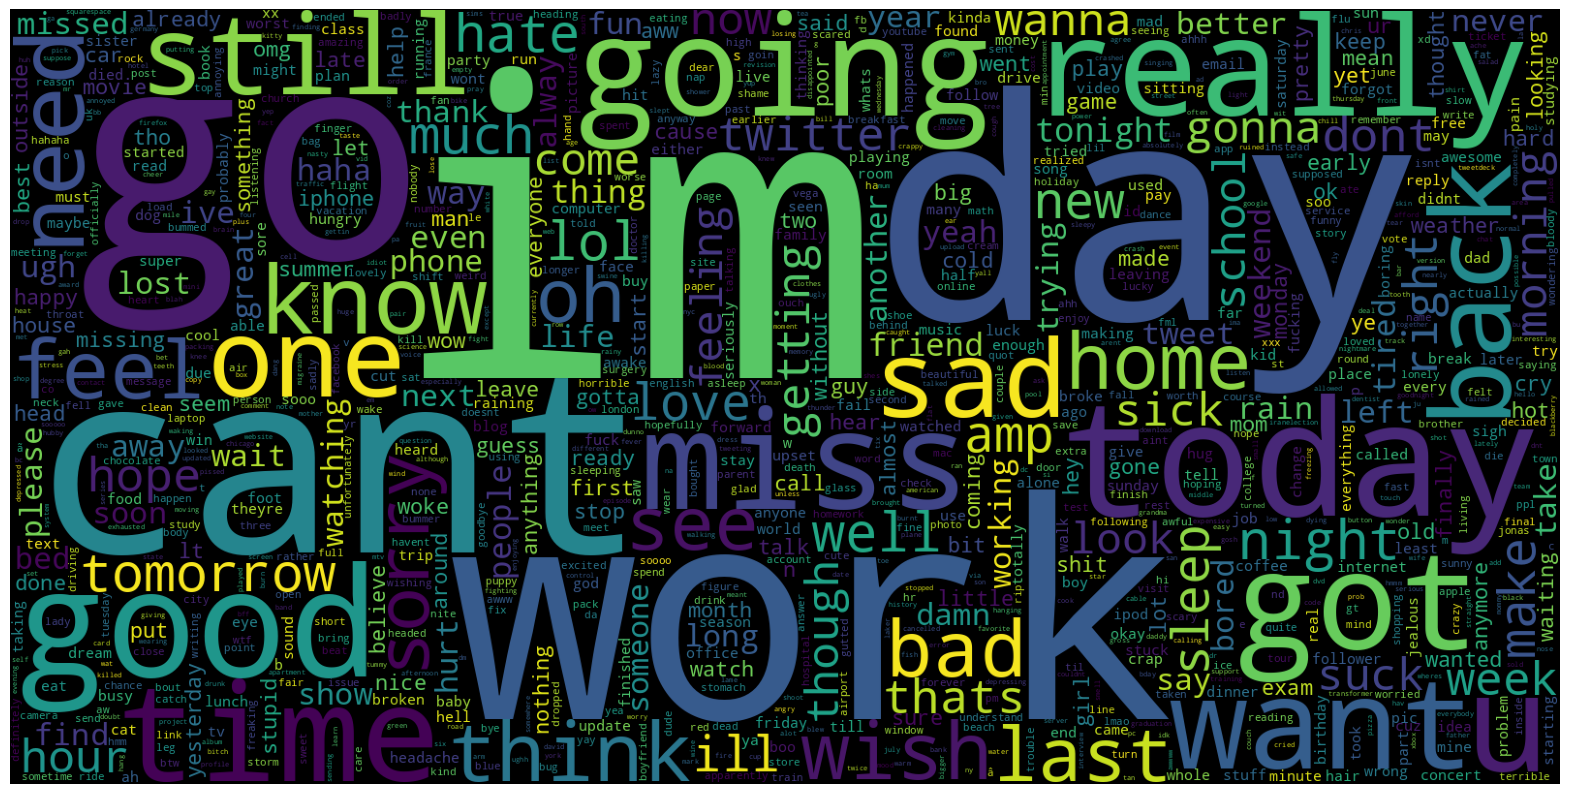

In [42]:
data_neg = data[data['target'] == 0]['text']  # Filter rows where label is equal to 1
data_neg_str = [" ".join(words) for words in data_neg]

plt.figure(figsize=(20, 20))
wc = WordCloud(max_words=1000, width=1600, height=800, collocations=False).generate(" ".join(data_neg_str))
plt.imshow(wc)
plt.axis("off")
plt.show()


### Plot a cloud of words for positive tweets



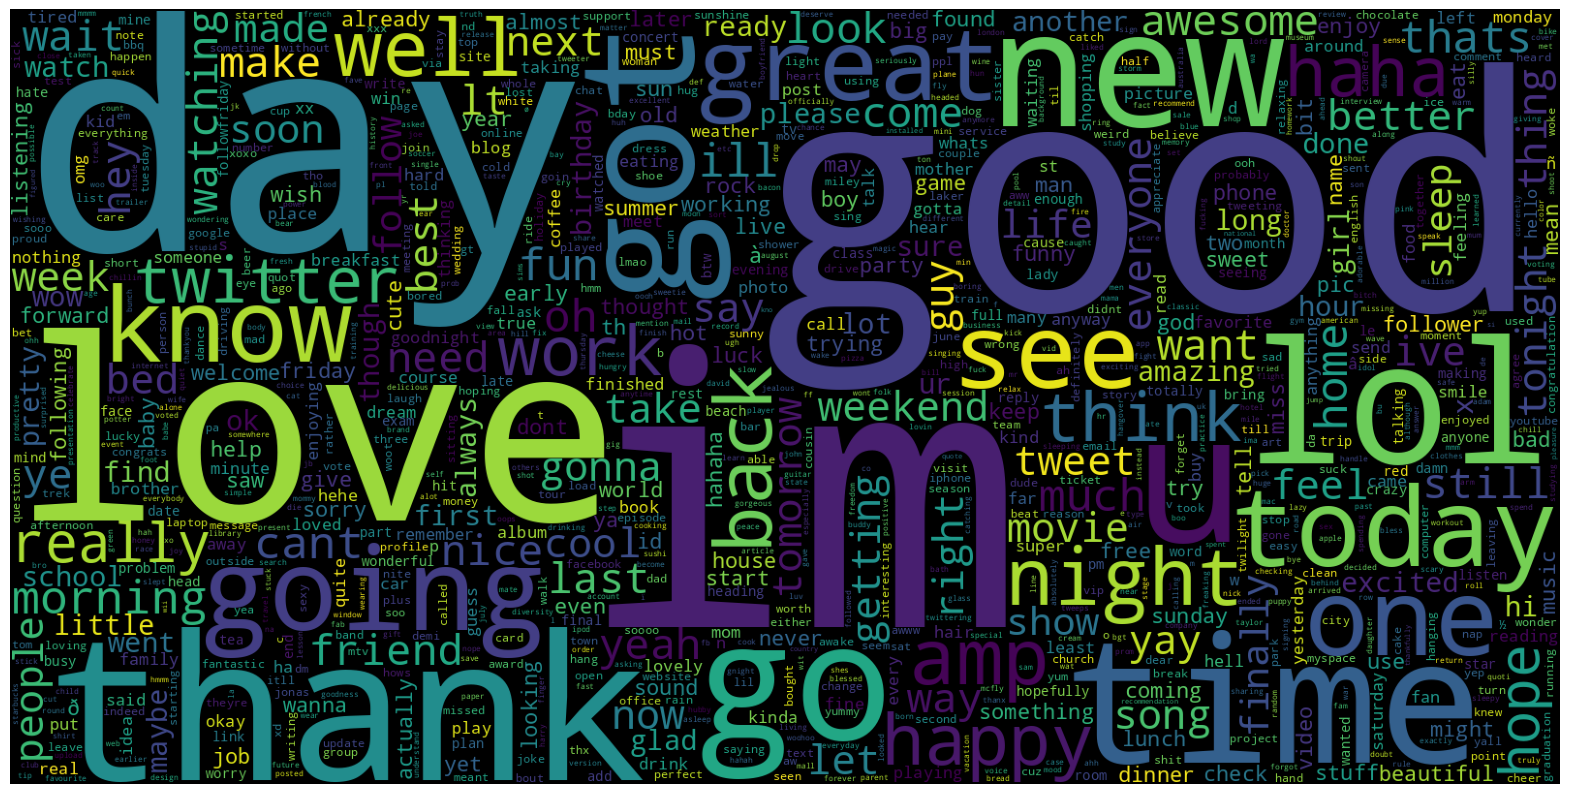

In [43]:
data_pos = data[data['target'] == 1]['text']  
data_pos_str = [" ".join(words) for words in data_pos]

plt.figure(figsize=(20, 20))
wc = WordCloud(max_words=1000, width=1600, height=800, collocations=False).generate(" ".join(data_pos_str))
plt.imshow(wc)
plt.axis("off")
plt.show()


# Deep Learning Models

## LSTM

Converting Sequences to Numbers and padding the sequences

In [89]:
max_len_lstm  = 100
tok_lstm = Tokenizer()
tok_lstm .fit_on_texts(X)
sequences_lstm  = tok_lstm .texts_to_sequences(X)
sequences_matrix_lstm  = sequence.pad_sequences(sequences_lstm ,maxlen=max_len_lstm )

In [90]:
sequences_matrix_lstm .shape

(20000, 100)

Data Splitting into 70:30 Ratio

In [91]:
X_train_lstm , X_test_lstm , Y_train_lstm , Y_test_lstm  = train_test_split(sequences_matrix_lstm , y, test_size=0.3, random_state=42,stratify=y)

In [92]:
# show the shape of data
print("Shape of X_train: ", X_train_lstm .shape)
print("Shape of X_test: ", X_test_lstm .shape)

Shape of X_train:  (14000, 100)
Shape of X_test:  (6000, 100)


### Model Architecture

In [93]:
def tensorflow_based_model(max_len_lstm): 
    inputs = Input(name='inputs',shape=[max_len_lstm])
    layer = Embedding(1000,100)(inputs) 
    layer = LSTM(64)(layer) 
    layer = Dense(256,name='FC1')(layer) 
    layer = Activation('relu')(layer) 
    layer = Dropout(0.5)(layer)
    layer = Dense(64,name='FC2')(layer) 
    layer = Activation('relu')(layer) 
    
    layer = Dense(1,name='out_layer')(layer) 
    layer = Activation('sigmoid')(layer) 
    model = Model(inputs=inputs,outputs=layer) 
    return model 


 ####  Model compilation

In [94]:
model_lstm = tensorflow_based_model(max_len_lstm)
model_lstm.compile(loss='binary_crossentropy',optimizer=RMSprop(),metrics=['accuracy'])


#### Model Summary


In [95]:
model_lstm.summary()

Model: "functional_8"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━┓
┃ Layer (type)                    ┃ Output Shape           ┃       Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━┩
│ inputs (InputLayer)             │ (None, 100)            │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ embedding_4 (Embedding)         │ (None, 100, 100)       │       100,000 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ lstm_5 (LSTM)                   │ (None, 64)             │        42,240 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ FC1 (Dense)                     │ (None, 256)            │        16,640 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ activation_2 (Activation)       │ (None, 256)            │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dropout_2 (Dropout)             │ (None, 256)            │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ FC2 (Dense)                     │ (None, 64)             │        16,448 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ activation_3 (Activation)       │ (None, 64)             │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ out_layer (Dense)               │ (None, 1)              │            65 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ activation_4 (Activation)       │ (None, 1)              │             0 │
└─────────────────────────────────┴────────────────────────┴───────────────┘

 Total params: 175,393 (685.13 KB)

 Trainable params: 175,393 (685.13 KB)

 Non-trainable params: 0 (0.00 B)

####  Fitting the Model

In [97]:
history_lstm=model_lstm.fit(X_train_lstm,Y_train_lstm,batch_size=32,epochs=50, validation_split=0.3)

Epoch 1/50
307/307 ━━━━━━━━━━━━━━━━━━━━ 4s 8ms/step - accuracy: 0.5402 - loss: 0.6788 - val_accuracy: 0.6876 - val_loss: 0.5864
Epoch 2/50
307/307 ━━━━━━━━━━━━━━━━━━━━ 2s 7ms/step - accuracy: 0.7278 - loss: 0.5389 - val_accuracy: 0.7079 - val_loss: 0.5639
Epoch 3/50
307/307 ━━━━━━━━━━━━━━━━━━━━ 2s 7ms/step - accuracy: 0.7459 - loss: 0.5073 - val_accuracy: 0.7086 - val_loss: 0.5601
Epoch 4/50
307/307 ━━━━━━━━━━━━━━━━━━━━ 2s 7ms/step - accuracy: 0.7478 - loss: 0.5053 - val_accuracy: 0.7110 - val_loss: 0.5551
Epoch 5/50
307/307 ━━━━━━━━━━━━━━━━━━━━ 2s 7ms/step - accuracy: 0.7670 - loss: 0.4877 - val_accuracy: 0.7140 - val_loss: 0.5795
Epoch 6/50
307/307 ━━━━━━━━━━━━━━━━━━━━ 2s 7ms/step - accuracy: 0.7805 - loss: 0.4641 - val_accuracy: 0.7126 - val_loss: 0.5761
Epoch 7/50
307/307 ━━━━━━━━━━━━━━━━━━━━ 2s 7ms/step - accuracy: 0.7885 - loss: 0.4507 - val_accuracy: 0.7057 - val_loss: 0.5906
Epoch 8/50
307/307 ━━━━━━━━━━━━━━━━━━━━ 2s 7ms/step - accuracy: 0.7857 - loss: 0.4466 - val_accuracy: 0.

#### Training accuracy and loss

In [123]:
train_acc_lstm = model_lstm.evaluate(X_train_lstm, Y_train_lstm)

438/438 ━━━━━━━━━━━━━━━━━━━━ 1s 3ms/step - accuracy: 0.9552 - loss: 0.1859


In [124]:
print("Training Accuracy:",train_acc_lstm[1]*100)
print("Training Loss:",train_acc_lstm[0]*100)

Training Accuracy: 87.46428489685059
Training Loss: 79.71215844154358


#### Validation accuracy and loss

In [125]:
test_accuracy_lstm = history_lstm.history['accuracy'][-1]
test_loss_lstm = history_lstm.history['loss'][-1]
print("Test Accuracy:", test_accuracy_lstm*100)
print("Test Loss:", test_loss_lstm*100)

Test Accuracy: 96.19387984275818
Test Loss: 8.482085913419724


#### precision, recall, f1-score



In [129]:
Y_pred_lstm = model_lstm.predict(X_test_lstm)
Y_pred_classes_lstm = np.round(Y_pred_lstm)

188/188 ━━━━━━━━━━━━━━━━━━━━ 1s 3ms/step


In [132]:
from sklearn.metrics import precision_score, recall_score, f1_score
precision_lstm = precision_score(Y_test_lstm, Y_pred_classes_lstm)
recall_lstm = recall_score(Y_test_lstm, Y_pred_classes_lstm)
f1_lstm = f1_score(Y_test_lstm, Y_pred_classes_lstm)

print("Precision:", precision_lstm*100)
print("Recall:", recall_lstm*100)
print("F1-score:", f1_lstm*100)

Precision: 63.43554236729311
Recall: 64.13333333333333
F1-score: 63.78252942151499


#### Plot training & validation loss values

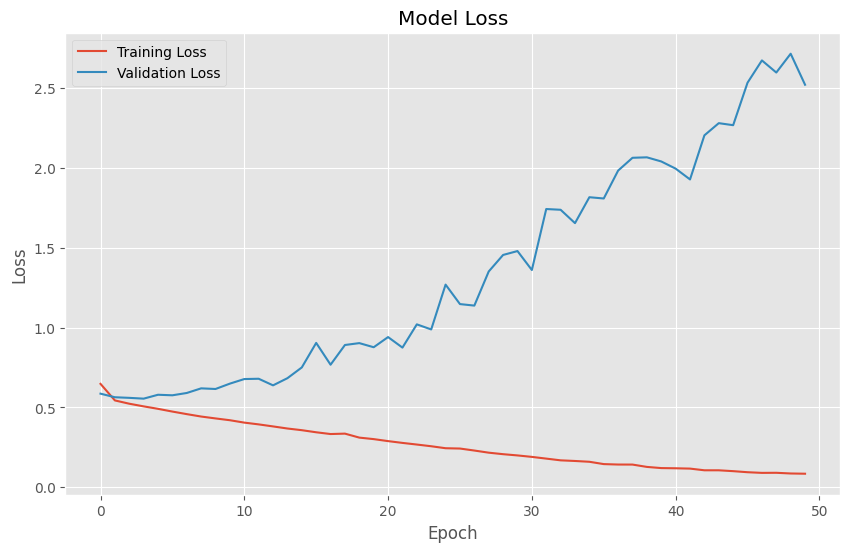

In [126]:
import matplotlib.pyplot as plt

plt.figure(figsize=(10, 6))
plt.plot(history_lstm.history['loss'], label='Training Loss')
plt.plot(history_lstm.history['val_loss'], label='Validation Loss')
plt.title('Model Loss')
plt.xlabel('Epoch')
plt.ylabel('Loss')
plt.legend()
plt.show()


## BiLSTM 1

Converting Sequences to Numbers and padding the sequences

Split data into training and testing sets


In [108]:
tokenizer1_bilstm = Tokenizer()
tokenizer1_bilstm.fit_on_texts(data['text'])
X_sequences1_bilstm = tokenizer1_bilstm.texts_to_sequences(data['text'])
max_len1_bilstm = 100  
X_pad1_bilstm = pad_sequences(X_sequences1_bilstm, maxlen=max_len1_bilstm)
# Define target variable
y1_bilstm = data['target'].values

X_train1_bilstm, X_test1_bilstm, y_train1_bilstm, y_test1_bilstm = train_test_split(X_pad1_bilstm, y1_bilstm, test_size=0.3, random_state=42)

#### Model Architecture

In [109]:
vocab_size1_bilstm = len(tokenizer1_bilstm.word_index) + 1
embedding_dim1_bilstm = 100

model1_bilstm = Sequential()
model1_bilstm.add(Embedding(input_dim=vocab_size1_bilstm, output_dim=embedding_dim1_bilstm))
model1_bilstm.add(Bidirectional(LSTM(units=256, dropout=0.2, recurrent_dropout=0.2, return_sequences=True)))
model1_bilstm.add(Bidirectional(LSTM(units=128, dropout=0.2, recurrent_dropout=0.2)))
model1_bilstm.add(Dropout(0.5))
model1_bilstm.add(Dense(units=64, activation='relu'))
model1_bilstm.add(Dense(units=1, activation='sigmoid'))
early_stopping = EarlyStopping(monitor='val_loss', patience=3, restore_best_weights=True)

 ####  Model compilation

In [110]:
model1_bilstm.compile(loss='binary_crossentropy', optimizer='adam', metrics=['accuracy'])

#### Model Summary


In [111]:
model2_bilstm.summary()

Model: "functional_10"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━┓
┃ Layer (type)                    ┃ Output Shape           ┃       Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━┩
│ inputs (InputLayer)             │ (None, 100)            │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ embedding_5 (Embedding)         │ (None, 100, 100)       │       100,000 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ bidirectional_4 (Bidirectional) │ (None, 256)            │       234,496 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_6 (Dense)                 │ (None, 64)             │        16,448 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ out_layer (Dense)               │ (None, 1)              │            65 │
└─────────────────────────────────┴────────────────────────┴───────────────┘

 Total params: 702,020 (2.68 MB)

 Trainable params: 351,009 (1.34 MB)

 Non-trainable params: 0 (0.00 B)

 Optimizer params: 351,011 (1.34 MB)

####  Fitting the Model

In [112]:
history1_bilstm = model1_bilstm.fit(X_train1_bilstm, y_train1_bilstm, batch_size=32, epochs=25, validation_data=(X_test1_bilstm, y_test1_bilstm), callbacks=[early_stopping])

Epoch 1/25
438/438 ━━━━━━━━━━━━━━━━━━━━ 214s 473ms/step - accuracy: 0.5761 - loss: 0.6528 - val_accuracy: 0.7217 - val_loss: 0.5439
Epoch 2/25
438/438 ━━━━━━━━━━━━━━━━━━━━ 206s 471ms/step - accuracy: 0.8195 - loss: 0.4081 - val_accuracy: 0.7123 - val_loss: 0.5860
Epoch 3/25
438/438 ━━━━━━━━━━━━━━━━━━━━ 262s 471ms/step - accuracy: 0.8849 - loss: 0.2880 - val_accuracy: 0.7058 - val_loss: 0.7085
Epoch 4/25
438/438 ━━━━━━━━━━━━━━━━━━━━ 206s 471ms/step - accuracy: 0.9254 - loss: 0.1961 - val_accuracy: 0.6973 - val_loss: 0.7944


In [117]:
train_acc1_bilstm = model1_bilstm.evaluate(X_train1_bilstm, y_train1_bilstm)

438/438 ━━━━━━━━━━━━━━━━━━━━ 40s 90ms/step - accuracy: 0.8441 - loss: 0.4095


#### Training accuracy and loss

In [119]:
print("Training Accuracy:",train_acc1_bilstm[1]*100)
print("Training Loss:",train_acc1_bilstm[0]*100)

Training Accuracy: 84.0571403503418
Training Loss: 41.35525822639465


#### Validation accuracy and loss

In [133]:
test_accuracy1_bilstm = history1_bilstm.history['accuracy'][-1]
test_loss1_bilstm = history1_bilstm.history['loss'][-1]
print("Validation Accuracy:", test_accuracy1_bilstm*100)
print("Validation Loss:", test_loss1_bilstm*100)

Validation Accuracy: 91.95713996887207
Validation Loss: 20.55716961622238


#### precision, recall, f1-score



In [134]:
Y_pred1_bilstm = model1_bilstm.predict(X_test1_bilstm)
Y_pred_classes1_bilstm = np.round(Y_pred1_bilstm)

188/188 ━━━━━━━━━━━━━━━━━━━━ 18s 93ms/step


In [136]:
from sklearn.metrics import precision_score, recall_score, f1_score
precision1_bilstm = precision_score(y_test1_bilstm, Y_pred_classes1_bilstm)
recall1_bilstm = recall_score(y_test1_bilstm, Y_pred_classes1_bilstm)
f11_bilstm = f1_score(y_test1_bilstm, Y_pred_classes1_bilstm)

print("Precision:", precision1_bilstm*100)
print("Recall:", recall1_bilstm*100)
print("F1-score:", f11_bilstm*100)

Precision: 72.63007840342124
Recall: 69.31972789115646
F1-score: 70.93630351548903


#### Plot training & validation loss values

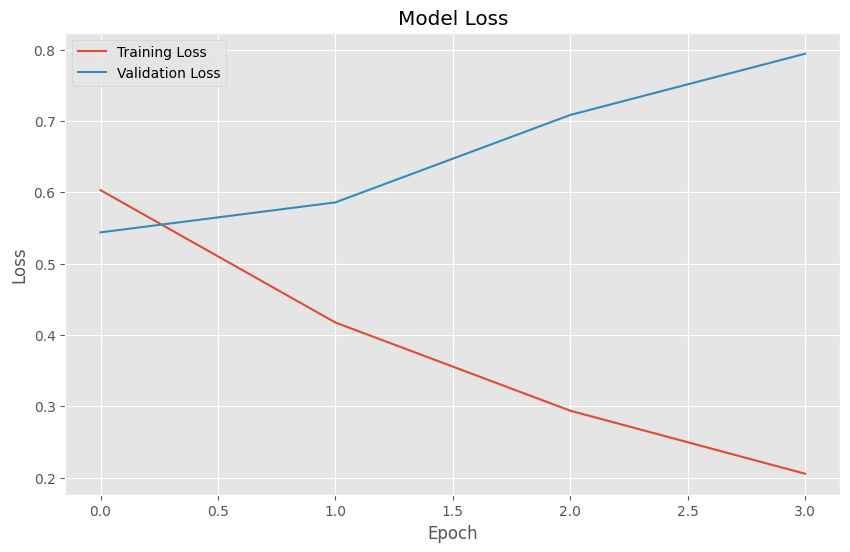

In [138]:
import matplotlib.pyplot as plt

plt.figure(figsize=(10, 6))
plt.plot(history1_bilstm.history['loss'], label='Training Loss')
plt.plot(history1_bilstm.history['val_loss'], label='Validation Loss')
plt.title('Model Loss')
plt.xlabel('Epoch')
plt.ylabel('Loss')
plt.legend()
plt.show()


## ML Models


### Logistic Regression, NB,SVM,XGBClassifier

In [143]:
from sklearn.model_selection import train_test_split
from sklearn.feature_extraction.text import CountVectorizer
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import accuracy_score
from sklearn.metrics import precision_score, recall_score, f1_score


In [78]:
# Flatten the list of lists into a list of strings
tokenized_texts = [' '.join(tokens) for tokens in data['text']]

# Convert tokenized text to BoW features
vectorizer = CountVectorizer()
X = vectorizer.fit_transform(tokenized_texts)

# Assuming df is your DataFrame with the target column modified
y = data['target']


In [79]:
X_train_ml, X_test_ml, y_train_ml, y_test_ml = train_test_split(X, y, test_size=0.3, random_state=42)

#### logistic regression model

In [139]:
logreg = LogisticRegression()
logreg.fit(X_train_ml, y_train_ml)
y_pred_logreg = logreg.predict(X_test_ml)

In [145]:
accuracy_logreg = accuracy_score(y_test_ml, y_pred_logreg)
precision_logreg = precision_score(y_test_ml, y_pred_logreg)
recall_logreg = recall_score(y_test_ml, y_pred_logreg)
f1_logreg = f1_score(y_test_ml, y_pred_logreg)
print("Logistic Regression ")
print("Accuracy:",accuracy_logreg*100)
print("Precision:", precision_logreg*100)
print("Recall:", recall_logreg*100)
print("F1-score:", f1_logreg*100)

Logistic Regression 
Accuracy: 72.18333333333334
Precision: 70.336
Recall: 74.76190476190476
F1-score: 72.48145094806264


#### Bernoulli Naive Bayes Classifier

In [140]:
bnb_model = BernoulliNB()
bnb_model.fit(X_train_ml, y_train_ml)
y_pred_bnb_model = bnb_model.predict(X_test_ml)

In [146]:
accuracy_bnb = accuracy_score(y_test_ml,y_pred_bnb_model)
precision_bnb = precision_score(y_test_ml, y_pred_bnb_model)
recall_bnb = recall_score(y_test_ml, y_pred_bnb_model)
f1_bnb = f1_score(y_test_ml, y_pred_bnb_model)
print("Bernoulli Naive Bayes Classifier ")
print("Accuracy:",accuracy_bnb*100)
print("Precision:", precision_bnb*100)
print("Recall:", recall_bnb*100)
print("F1-score:", f1_bnb*100)

Bernoulli Naive Bayes Classifier 
Accuracy: 72.41666666666666
Precision: 71.08631440761405
Recall: 73.67346938775509
F1-score: 72.35677300818439


#### svm

In [141]:
svm_model = SVC()
svm_model.fit(X_train_ml, y_train_ml)
Y_pred_svm = svm_model.predict(X_test_ml)

In [149]:
accuracy_svm = accuracy_score(y_test_ml, Y_pred_svm)
precision_svm = precision_score(y_test_ml, Y_pred_svm)
recall_svm = recall_score(y_test_ml, Y_pred_svm)
f1_svm = f1_score(y_test_ml, Y_pred_svm)
print("SVM ")
print("Accuracy:",accuracy_svm*100)
print("Precision:", precision_svm*100)
print("Recall:", recall_svm*100)
print("F1-score:", f1_svm*100)

SVM 
Accuracy: 71.81666666666666
Precision: 68.91850954256286
Recall: 77.38095238095238
F1-score: 72.90498317577313


#### XGBClassifier

In [142]:
from xgboost import XGBClassifier
xgb_model = XGBClassifier()
xgb_model.fit(X_train_ml, y_train_ml)
Y_pred_xgb = xgb_model.predict(X_test_ml)

In [150]:
accuracy_xgb = accuracy_score(y_test_ml, Y_pred_xgb)
precision_xgb = precision_score(y_test_ml, Y_pred_xgb )
recall_xgb = recall_score(y_test_ml, Y_pred_xgb )
f1_xgb  = f1_score(y_test_ml, Y_pred_xgb )
print("Logistic Regression ")
print("Accuracy:",accuracy_xgb *100)
print("Precision:", precision_xgb *100)
print("Recall:", recall_xgb *100)
print("F1-score:", f1_xgb *100)

Logistic Regression 
Accuracy: 70.46666666666667
Precision: 66.15938018815717
Recall: 81.3265306122449
F1-score: 72.96307598413182


### Plots of Accuracies

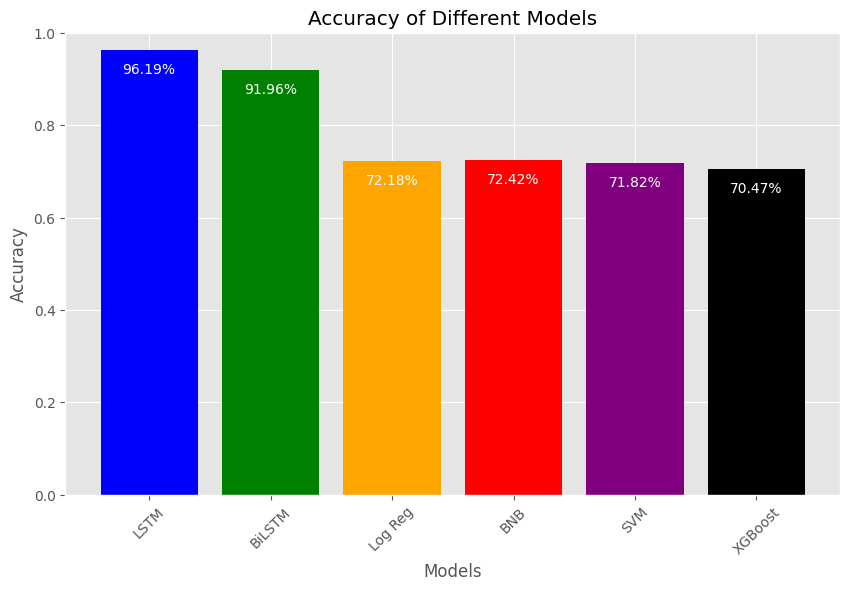

In [153]:
import matplotlib.pyplot as plt

# Accuracy values of the six models
accuracies = [test_accuracy_lstm,test_accuracy1_bilstm,accuracy_logreg,accuracy_bnb,accuracy_svm, accuracy_xgb]

# Labels for the models
models = ['LSTM','BiLSTM','Log Reg','BNB','SVM' ,'XGBoost']

# Plotting the accuracies
plt.figure(figsize=(10, 6))
bars = plt.bar(models, accuracies, color=['blue', 'green', 'orange', 'red', 'purple', 'black'])
plt.title('Accuracy of Different Models')
plt.xlabel('Models')
plt.ylabel('Accuracy')
plt.xticks(rotation=45)
plt.ylim(0, 1)  # Assuming accuracies are between 0 and 1

# Adding horizontal lines with the accuracy values
for bar, acc in zip(bars, accuracies):
    plt.gca().text(bar.get_x() + bar.get_width() / 2, bar.get_height() - 0.05, f"{acc*100:.2f}%", 
                   ha='center', color='white', fontsize=10)

plt.show()

#### Save the model

In [166]:
model_lstm.save('lstm_model.h5')

In [157]:
from keras.models import load_model
loaded_model_lstm = load_model('lstm_model.h5')

In [158]:
from tensorflow.keras.preprocessing.sequence import pad_sequences

In [251]:
def preprocess_input1(input_text):
    # Tokenize the input text
    input_sequence = tok.texts_to_sequences([input_text])
    # Pad the input sequence
    padded_sequence = pad_sequences(input_sequence, maxlen=max_len_lstm)
    return padded_sequence

# Example input text
#input_text1 = "I love you."
input_text2 = 'Try you should go outside and jump off the cliff'
# Preprocess the input
preprocessed_input1 = preprocess_input1(input_text1)

# Use the trained model to predict
prediction1 = model_lstm.predict(preprocessed_input1)

# Print the prediction
if prediction1[0][0] >=0.5:
    print("The input contains hate speech.")
else:
    print("The input does not contain hate speech.")


1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 26ms/step
The input contains hate speech.


In [252]:
prediction

array([[0.52053356]], dtype=float32)

#### Test Case

In [262]:
def preprocess_text(text):
    # Convert to lowercase
    text = text.lower()
    # Remove email addresses
    text = re.sub('@[^\s]+', ' ', text)
    # Remove URLs
    text = re.sub('((www\.[^\s]+)|(https?://[^\s]+))', ' ', text)
    # Remove punctuation
    text = text.translate(str.maketrans('', '', string.punctuation))
    # Remove numbers
    text = re.sub('[0-9]+', '', text)
    # Tokenize
    tokenizer = RegexpTokenizer(r'\w+')
    tokens = tokenizer.tokenize(text)
    # Remove stopwords
    stop_words = set(stopwords.words('english'))
    tokens = [word for word in tokens if word not in stop_words]
    # Lemmatize
    lemmatizer = WordNetLemmatizer()
    tokens = [lemmatizer.lemmatize(word) for word in tokens]
    return ' '.join(tokens)

# Get user input
user_input='Hate'

# Preprocess user input and make prediction
preprocessed_text = preprocess_text(user_input)
sequence = tok.texts_to_sequences([preprocessed_text])
padded_sequence = pad_sequences(sequence, maxlen=max_len)
prediction =loaded_model_lstm .predict(padded_sequence)
print( prediction)
# Display prediction result
if prediction > 0.5:
    print('Prediction: Hate Speech')
else:
    print('Prediction: Not Hate Speech')


1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 18ms/step
[[0.52053356]]
Prediction: Hate Speech
